In [1]:
from google.cloud import bigquery
import pandas as pd

# Tạo client BigQuery để truy vấn dữ liệu
project = 'dw-assignment-242'  # Thay thế với ID dự án của bạn
client = bigquery.Client(project=project)

# Kiểm tra kết nối bằng cách lấy thông tin bảng
datasets = client.list_datasets()  # Liệt kê các dataset
for dataset in datasets:
    print(f"Dataset: {dataset.dataset_id}")


Dataset: job_analysis


# * Thu thập dữ liệu

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [3]:
df = df.dropna(subset=['salary_year_avg'])

In [5]:
dataset_id = "job_analysis"
table_name = "raw_jobs_1"

df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
          project_id=project,
          if_exists='replace')

<ipython-input-5-27603bb90c4c>:4: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


In [6]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "job_descriptions.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ravindrasinghrana/job-description-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

100%|██████████| 457M/457M [00:24<00:00, 19.9MB/s]

Extracting zip of job_descriptions.csv...


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burk

In [7]:
dataset_id = "job_analysis"
table_name = "raw_jobs_2"

# Lọc ra Job Posting Date trong 2023
df = df[df["Job Posting Date"].str.contains("2023")]

df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
          project_id=project,
          if_exists='replace')

<ipython-input-7-9290977ba095>:7: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
100%|██████████| 1/1 [00:00<00:00, 3100.00it/s]


# 1. Tập dữ liệu 1

## 1.1 Extract

In [8]:
dataset_id = "job_analysis"
table_name = "raw_jobs_1"
query = f"SELECT * FROM `{dataset_id}.{table_name}`"

# Thực hiện truy vấn và lưu kết quả vào DataFrame
df = pd.read_gbq(query, project_id=project)

# Hiển thị vài dòng đầu của DataFrame
print(df.head())

<ipython-input-8-85af60f85788>:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id=project)


  job_title_short                             job_title     job_location  \
0  Cloud Engineer              Cloud SysSecOps Engineer  A Coruña, Spain   
1  Cloud Engineer              Cloud DevSecOps Engineer  A Coruña, Spain   
2  Cloud Engineer    Customer Engineer, Computer Vision         Anywhere   
3  Cloud Engineer                        Cloud Engineer         Anywhere   
4  Cloud Engineer  Staff Engineer, Service Architecture         Anywhere   

                                             job_via job_schedule_type  \
0                               via Infosec-Jobs.com         Full-time   
1                               via Infosec-Jobs.com         Full-time   
2  via Best AI Jobs: AI, Machine Learning And Dat...         Full-time   
3                                           via Dice         Full-time   
4                                     via Levels.fyi         Full-time   

   job_work_from_home search_location      job_posted_date  \
0               False           Spai

## 1.2. Transform

In [9]:
df_backup = df

In [10]:
df = df_backup

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Cloud Engineer,Cloud SysSecOps Engineer,"A Coruña, Spain",via Infosec-Jobs.com,Full-time,False,Spain,2023-02-15 12:05:30,True,False,Spain,year,56700.0,NaN,Denodo Technologies,"['aws', 'azure', 'windows']","{'cloud': ['aws', 'azure'], 'os': ['windows']}"
1,Cloud Engineer,Cloud DevSecOps Engineer,"A Coruña, Spain",via Infosec-Jobs.com,Full-time,False,Spain,2023-02-15 12:05:30,True,False,Spain,year,125253.0,NaN,Denodo Technologies,"['aws', 'azure', 'puppet', 'ansible', 'chef', ...","{'cloud': ['aws', 'azure'], 'other': ['puppet'..."
2,Cloud Engineer,"Customer Engineer, Computer Vision",Anywhere,"via Best AI Jobs: AI, Machine Learning And Dat...",Full-time,True,Mexico,2023-04-25 15:19:05,False,False,Mexico,year,100000.0,NaN,Scaleai,"['typescript', 'python']","{'programming': ['typescript', 'python']}"
3,Cloud Engineer,Cloud Engineer,Anywhere,via Dice,Full-time,True,Canada,2023-04-03 15:22:58,True,False,Canada,year,90000.0,NaN,Zyreoneconsulting LLC,"['python', 'aws', 'docker']","{'cloud': ['aws'], 'other': ['docker'], 'progr..."
4,Cloud Engineer,"Staff Engineer, Service Architecture",Anywhere,via Levels.fyi,Full-time,True,Argentina,2023-11-29 15:13:19,False,False,Argentina,year,197500.0,NaN,MongoDB,"['mongodb', 'mongodb', 'c++']","{'databases': ['mongodb'], 'programming': ['mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,Software Engineer,"Staff Software Development Engineer in Test, Data","Xinyi District, Taipei City, Taiwan",via Levels.fyi,Full-time,False,Taiwan,2023-12-04 07:24:59,False,False,Taiwan,year,56572.0,NaN,Netskope,"['python', 'go', 'java', 'sql', 'no-sql', 'ela...","{'databases': ['elasticsearch'], 'other': ['do..."
21999,Software Engineer,"Sr. Software Engineer, NPA Data Path","Xinyi District, Taipei City, Taiwan",via Levels.fyi,Full-time,False,Taiwan,2023-10-26 03:05:36,True,False,Taiwan,year,58515.0,NaN,Netskope,"['linux', 'docker']","{'os': ['linux'], 'other': ['docker']}"
22000,Software Engineer,Business Intelligence Developer (Zurich - Hybr...,"Zürich, Switzerland",via Ai-Jobs.net,Full-time,False,Switzerland,2023-02-14 09:53:39,False,False,Switzerland,year,89100.0,NaN,SMG Swiss Marketplace Group,"['sql', 'snowflake', 'bigquery', 'azure', 'red...","{'analyst_tools': ['looker', 'tableau', 'power..."
22001,Software Engineer,"Principal, Computer Vision Engineer, Online Ca...","Zürich, Switzerland",via Ai-Jobs.net,Full-time,False,Switzerland,2023-06-21 12:56:16,False,False,Switzerland,year,44418.5,NaN,Magic Leap,['git'],{'other': ['git']}


In [11]:
# Giữ các cột company_name, job_title_short, job_title, job_schedule_type, job_posted_date, job_skills, job_via, job_country, salary_year_avg
df = df[["company_name", "job_title_short", "job_title", "job_schedule_type", "job_posted_date", "job_skills", "job_via", "job_country", "salary_year_avg"]]

# Kiểm tra giá trị thiếu
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

company_name         0.000000
job_title_short      0.000000
job_title            0.000000
job_schedule_type    0.072717
job_posted_date      0.000000
job_skills           8.330682
job_via              0.000000
job_country          0.000000
salary_year_avg      0.000000
dtype: float64


In [12]:
# Bỏ giá trị thiếu ở job_schedule_type
df['job_schedule_type'] = df['job_schedule_type'].dropna();

# Điền khuyết bằng giá trị rỗng '[]' -> không có thông tin
df['job_skills'] = df['job_skills'].fillna("[]")

# Thay đổi giá trị ở cột job_title_short: có chứa Senior thì bỏ Senior
df["job_title_short"] = df["job_title_short"].str.replace("Senior", "")

# Loại bỏ "via" ở cột job_via cho các hàng
df["job_via"] = df["job_via"].str.replace("via ", "")

# Chuyển đổi sang định dạng "dd/mm/yy"
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_date'] = df['job_posted_date'].dt.strftime('%d/%m/%Y')

<ipython-input-12-c79f03da5ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_schedule_type'] = df['job_schedule_type'].dropna();
<ipython-input-12-c79f03da5ed9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_skills'] = df['job_skills'].fillna("[]")
<ipython-input-12-c79f03da5ed9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [13]:
# Đổi tên cột
# Đổi tên các cột theo mapping
df = df.rename(columns={
    "company_name": "company",
    "job_title_short": "role",
    "job_title": "title",
    "job_schedule_type": "type",
    "job_posted_date": "posted_date",
    "job_skills": "skills",
    "job_via": "portal",
    "job_country": "country",
    "salary_year_avg": "avg_year_salary"
})

# Sắp xếp lại thứ tự các cột theo thứ tự mong muốn
df = df[["company", "title", "role", "type", "posted_date", "skills", "portal", "country", "avg_year_salary"]]

# Kiểm tra kết quả
print(df.head())

                 company                                 title  \
0    Denodo Technologies              Cloud SysSecOps Engineer   
1    Denodo Technologies              Cloud DevSecOps Engineer   
2                Scaleai    Customer Engineer, Computer Vision   
3  Zyreoneconsulting LLC                        Cloud Engineer   
4                MongoDB  Staff Engineer, Service Architecture   

             role       type posted_date  \
0  Cloud Engineer  Full-time  15/02/2023   
1  Cloud Engineer  Full-time  15/02/2023   
2  Cloud Engineer  Full-time  25/04/2023   
3  Cloud Engineer  Full-time  03/04/2023   
4  Cloud Engineer  Full-time  29/11/2023   

                                              skills  \
0                        ['aws', 'azure', 'windows']   
1  ['aws', 'azure', 'puppet', 'ansible', 'chef', ...   
2                           ['typescript', 'python']   
3                        ['python', 'aws', 'docker']   
4                      ['mongodb', 'mongodb', 'c++']   

 

In [14]:
df_1 = df.copy()

df_1

,company,title,role,type,posted_date,skills,portal,country,avg_year_salary
0,Denodo Technologies,Cloud SysSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'windows']",Infosec-Jobs.com,Spain,56700.0
1,Denodo Technologies,Cloud DevSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'puppet', 'ansible', 'chef', ...",Infosec-Jobs.com,Spain,125253.0
2,Scaleai,"Customer Engineer, Computer Vision",Cloud Engineer,Full-time,25/04/2023,"['typescript', 'python']","Best AI Jobs: AI, Machine Learning And Data Sc...",Mexico,100000.0
3,Zyreoneconsulting LLC,Cloud Engineer,Cloud Engineer,Full-time,03/04/2023,"['python', 'aws', 'docker']",Dice,Canada,90000.0
4,MongoDB,"Staff Engineer, Service Architecture",Cloud Engineer,Full-time,29/11/2023,"['mongodb', 'mongodb', 'c++']",Levels.fyi,Argentina,197500.0
...,...,...,...,...,...,...,...,...,...
21998,Netskope,"Staff Software Development Engineer in Test, Data",Software Engineer,Full-time,04/12/2023,"['python', 'go', 'java', 'sql', 'no-sql', 'ela...",Levels.fyi,Taiwan,56572.0
21999,Netskope,"Sr. Software Engineer, NPA Data Path",Software Engineer,Full-time,26/10/2023,"['linux', 'docker']",Levels.fyi,Taiwan,58515.0
22000,SMG Swiss Marketplace Group,Business Intelligence Developer (Zurich - Hybr...,Software Engineer,Full-time,14/02/2023,"['sql', 'snowflake', 'bigquery', 'azure', 'red...",Ai-Jobs.net,Switzerland,89100.0
22001,Magic Leap,"Principal, Computer Vision Engineer, Online Ca...",Software Engineer,Full-time,21/06/2023,['git'],Ai-Jobs.net,Switzerland,44418.5


In [ ]:
# prompt: Tải file csv từ df

# Lưu DataFrame thành file CSV
df.to_csv('output_1.csv', index=False)

# Tải file CSV về máy tính (nếu đang chạy trên Colab)
from google.colab import files
files.download('output_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Tập dữ liệu 2

## 2.1. Extract

In [36]:
dataset_id = "job_analysis"
table_name = "raw_jobs_2"
query = f"SELECT * FROM `{dataset_id}.{table_name}`"

# Thực hiện truy vấn và lưu kết quả vào DataFrame
df = pd.read_gbq(query, project_id=project)

# Hiển thị vài dòng đầu của DataFrame
print(df.head())

<ipython-input-36-3180cef4fc8f>:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id=project)


KeyboardInterrupt: 

## 2.2. Transform

In [16]:
df_backup = df

In [42]:
df = df_backup

df

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,2648461146284111,4 to 8 Years,B.Tech,$63K-$80K,Kigali,Rwanda,-1.940300,29.873900,Contract,21846,...,9337646445,Software Engineer,Backend Developer,Idealist,A Backend Developer is tasked with building an...,"{'Transportation Benefits, Professional Develo...",Proficiency in one or more backend programming...,Develop server-side logic and databases using ...,Starbucks,"{""Sector"":""Food and Beverage"",""Industry"":""Food..."
1,203371286579529,2 to 11 Years,M.Tech,$58K-$98K,Kampala,Uganda,1.373300,32.290300,Contract,79679,...,(984)422-5771x279,Software Engineer,Backend Developer,Internships.com,A Backend Developer is tasked with building an...,"{'Employee Referral Programs, Financial Counse...",Proficiency in one or more backend programming...,Develop server-side logic and databases using ...,Mosaic,"{""Sector"":""Fertilizers"",""Industry"":""Chemicals""..."
2,1970786331479451,5 to 9 Years,B.Com,$57K-$102K,Bamako,Mali,17.570700,-3.996200,Contract,77034,...,298-837-2050,Software Engineer,Backend Developer,SimplyHired,A Backend Developer is tasked with building an...,"{'Employee Assistance Programs (EAP), Tuition ...",Proficiency in one or more backend programming...,Develop server-side logic and databases using ...,"Fidelity Investments, Inc.","{""Sector"":""Financial Services/Investment Manag..."
3,180155309539553,0 to 12 Years,MCA,$55K-$96K,Manila,Philippines,12.879721,121.774017,Contract,16940,...,756.943.3837,Software Engineer,Backend Developer,LinkedIn,A Backend Developer is tasked with building an...,"{'Employee Referral Programs, Financial Counse...",Proficiency in one or more backend programming...,Develop server-side logic and databases using ...,Wesfarmers Limited,"{""Sector"":""Retail and Conglomerate"",""Industry""..."
4,1237553065527000,1 to 9 Years,BA,$62K-$105K,Oslo,Norway,60.472000,8.468900,Contract,120828,...,+1-686-262-7022x709,Software Engineer,Backend Developer,Internships.com,A Backend Developer is tasked with building an...,"{'Tuition Reimbursement, Stock Options or Equi...",Proficiency in one or more backend programming...,Develop server-side logic and databases using ...,Hero MotoCorp,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570833,2780549106046002,4 to 14 Years,BBA,$55K-$105K,Podgorica,Montenegro,42.708700,19.374400,Temporary,79829,...,+1-670-365-2762x2106,Social Worker,Child Welfare Worker,SimplyHired,"Work with at-risk children and families, asses...","{'Life and Disability Insurance, Stock Options...",Child welfare policies and regulations Child p...,Provide support and counseling to children and...,AutoNation,"{""Sector"":""Automotive"",""Industry"":""Automotive ..."
570834,1605148258165038,2 to 9 Years,B.Com,$65K-$123K,Belmopan,Belize,17.189900,-88.497600,Temporary,90614,...,792-658-1231x332,Social Worker,Child Welfare Worker,SimplyHired,"Work with at-risk children and families, asses...","{'Childcare Assistance, Paid Time Off (PTO), R...",Child welfare policies and regulations Child p...,Provide support and counseling to children and...,Keurig Dr Pepper Inc.,"{""Sector"":""Beverage"",""Industry"":""Food and Beve..."
570835,3021822801845479,3 to 8 Years,B.Com,$56K-$114K,Abuja,Nigeria,9.082000,8.675300,Temporary,57370,...,861-208-2871,Social Worker,Child Welfare Worker,Jobs2Careers,"Work with at-risk children and families, asses...","{'Casual Dress Code, Social and Recreational A...",Child welfare policies and regulations Child p...,Provide support and counseling to children and...,Page Industries,"{""Sector"":""Apparel"",""Industry"":""Apparel and Te..."
570836,1923597047153986,0 to 14 Years,B.Com,$64K-$103K,Kabul,Afghanistan,33.939100,67.710000,Temporary,110221,...,914.935.0724x73

In [43]:
# Lấy các cột Company, Role, Job Title, Job Posting Date, skills, Work Type, Job Portal, Salary Range, Country
df = df[["Company", "Role", "Job Title", "Job Posting Date", "skills", "Work Type", "Job Portal", "Salary Range", "Country"]]

# Kiểm tra giá trị thiếu
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

Company             0.0
Role                0.0
Job Title           0.0
Job Posting Date    0.0
skills              0.0
Work Type           0.0
Job Portal          0.0
Salary Range        0.0
Country             0.0
dtype: float64


In [44]:
# Lọc ra Role = Data Engineer, Data Analyst, Data Scientist, , Business Analyst, Machine Learning Engineer hoặc Job Title = Software Engineer
df = df[df["Role"].isin(["Data Engineer", "Data Analyst", "Data Scientist", "Business Analyst", "Machine Learning Engineer"]) | df["Job Title"].isin(["Software Engineer"])]

# Biến đổi cột Role ở các hàng mà cột Job Title = Software Engineer thành Software Engineer
df.loc[df["Job Title"] == "Software Engineer", "Role"] = "Software Engineer"

# Chuyển cột thành kiểu datetime và định dạng lại thành dd/mm/yyyy
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date']).dt.strftime('%d/%m/%Y')

# Lấy lương trung bình ở cột Salary Range
def process_salary_range(salary_range):
    salary_split = salary_range.replace('$', '').replace('K', '').split('-')

    lower_salary = int(salary_split[0]) * 1000
    upper_salary = int(salary_split[1]) * 1000
    return (lower_salary + upper_salary) / 2

df['Salary Range'] = df['Salary Range'].apply(process_salary_range)

<ipython-input-44-9c6bd99d207b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["Job Title"] == "Software Engineer", "Role"] = "Software Engineer"
<ipython-input-44-9c6bd99d207b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date']).dt.strftime('%d/%m/%Y')
<ipython-input-44-9c6bd99d207b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [46]:
import re

def extract_skills(text):
    # Tìm tất cả các kỹ năng trong ngoặc
    skills = re.findall(r'\((.*?)\)', text)
    # Tách các kỹ năng trong ngoặc, loại bỏ dấu phẩy thừa và khoảng trắng
    skill_list = [skill.strip() for sublist in skills for skill in sublist.split(',')]
    # Loại bỏ các từ không mong muốn như 'e.g.' và 'or', đồng thời loại bỏ khoảng trắng thừa
    unwanted_words = ['e.g.', 'or', 'Extract', 'Transform', 'Load']
    # Loại bỏ phần 'or' trong các kỹ năng như 'SQL or NoSQL'
    clean_skills = []
    for skill in skill_list:
        skill = skill.strip()
        if skill not in unwanted_words:
            if ' or ' in skill:
                skill_parts = skill.split(' or ')
                clean_skills.extend([part.strip() for part in skill_parts])
            elif ' and ' in skill:
                skill_parts = skill.split(' and ')
                clean_skills.extend([part.strip() for part in skill_parts])
            else:
                clean_skills.append(skill)

    return clean_skills

# Áp dụng hàm cho cột job_skills
df['skills'] = df['skills'].apply(extract_skills)

# Kiểm tra kết quả
print(df['skills'] .value_counts().to_string())

skills
[Java, Python, Node.js, Ruby, SQL, NoSQL, Express, Django]                        3762
[SQL, Python, Tableau, Power BI]                                                  3696
[Git]                                                                             3592
[scikit-learn, TensorFlow, PyTorch, Hadoop, Spark, Python, R]                     2515
[Python, Bash, CI/CD, Docker, Kubernetes, Terraform, Ansible, AWS, Azure, GCP]    2450
[]                                                                                1199
[Hadoop, Spark]                                                                   1182


In [47]:
# Đổi tên cột
# Đổi tên các cột theo mapping
df = df.rename(columns={
    "Company": "company",
    "Role": "role",
    "Job Title": "title",
    "Work Type": "type",
    "Job Posting Date": "posted_date",
    "skills": "skills",
    "Job Portal": "portal",
    "Country": "country",
    "Salary Range": "avg_year_salary"
})

# Sắp xếp lại thứ tự các cột theo thứ tự mong muốn
df = df[["company", "title", "role", "type", "posted_date", "skills", "portal", "country", "avg_year_salary"]]

# Kiểm tra kết quả
df

,company,title,role,type,posted_date,skills,portal,country,avg_year_salary
0,Starbucks,Software Engineer,Software Engineer,Contract,02/09/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Idealist,Rwanda,71500.0
1,Mosaic,Software Engineer,Software Engineer,Contract,26/01/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Internships.com,Uganda,78000.0
2,"Fidelity Investments, Inc.",Software Engineer,Software Engineer,Contract,17/03/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",SimplyHired,Mali,79500.0
3,Wesfarmers Limited,Software Engineer,Software Engineer,Contract,07/05/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",LinkedIn,Philippines,75500.0
4,Hero MotoCorp,Software Engineer,Software Engineer,Contract,11/05/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Internships.com,Norway,83500.0
...,...,...,...,...,...,...,...,...,...
531589,Lennar,Data Scientist,Machine Learning Engineer,Temporary,16/08/2023,[],Stack Overflow Jobs,Benin,73000.0
531590,Sinopec,Data Scientist,Machine Learning Engineer,Temporary,25/07/2023,[],Monster,Italy,85000.0
531591,Synchrony Financial,Data Scientist,Machine Learning Engineer,Temporary,10/08/2023,[],Internships.com,Bhutan,70500.0
531592,Unum Group,Data Scientist,Machine Learning Engineer,Temporary,26/05/2023,[],The Muse,Ghana,90000.0


In [48]:
df_2 = df.copy()

df_2

,company,title,role,type,posted_date,skills,portal,country,avg_year_salary
0,Starbucks,Software Engineer,Software Engineer,Contract,02/09/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Idealist,Rwanda,71500.0
1,Mosaic,Software Engineer,Software Engineer,Contract,26/01/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Internships.com,Uganda,78000.0
2,"Fidelity Investments, Inc.",Software Engineer,Software Engineer,Contract,17/03/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",SimplyHired,Mali,79500.0
3,Wesfarmers Limited,Software Engineer,Software Engineer,Contract,07/05/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",LinkedIn,Philippines,75500.0
4,Hero MotoCorp,Software Engineer,Software Engineer,Contract,11/05/2023,"[Java, Python, Node.js, Ruby, SQL, NoSQL, Expr...",Internships.com,Norway,83500.0
...,...,...,...,...,...,...,...,...,...
531589,Lennar,Data Scientist,Machine Learning Engineer,Temporary,16/08/2023,[],Stack Overflow Jobs,Benin,73000.0
531590,Sinopec,Data Scientist,Machine Learning Engineer,Temporary,25/07/2023,[],Monster,Italy,85000.0
531591,Synchrony Financial,Data Scientist,Machine Learning Engineer,Temporary,10/08/2023,[],Internships.com,Bhutan,70500.0
531592,Unum Group,Data Scientist,Machine Learning Engineer,Temporary,26/05/2023,[],The Muse,Ghana,90000.0


# 3. Gộp

In [49]:
df = pd.concat([df_1, df_2], ignore_index=True)

df

,company,title,role,type,posted_date,skills,portal,country,avg_year_salary
0,Denodo Technologies,Cloud SysSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'windows']",Infosec-Jobs.com,Spain,56700.0
1,Denodo Technologies,Cloud DevSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'puppet', 'ansible', 'chef', ...",Infosec-Jobs.com,Spain,125253.0
2,Scaleai,"Customer Engineer, Computer Vision",Cloud Engineer,Full-time,25/04/2023,"['typescript', 'python']","Best AI Jobs: AI, Machine Learning And Data Sc...",Mexico,100000.0
3,Zyreoneconsulting LLC,Cloud Engineer,Cloud Engineer,Full-time,03/04/2023,"['python', 'aws', 'docker']",Dice,Canada,90000.0
4,MongoDB,"Staff Engineer, Service Architecture",Cloud Engineer,Full-time,29/11/2023,"['mongodb', 'mongodb', 'c++']",Levels.fyi,Argentina,197500.0
...,...,...,...,...,...,...,...,...,...
40394,Lennar,Data Scientist,Machine Learning Engineer,Temporary,16/08/2023,[],Stack Overflow Jobs,Benin,73000.0
40395,Sinopec,Data Scientist,Machine Learning Engineer,Temporary,25/07/2023,[],Monster,Italy,85000.0
40396,Synchrony Financial,Data Scientist,Machine Learning Engineer,Temporary,10/08/2023,[],Internships.com,Bhutan,70500.0
40397,Unum Group,Data Scientist,Machine Learning Engineer,Temporary,26/05/2023,[],The Muse,Ghana,90000.0


In [50]:
# Định dạng cách biểu diễn ở role: Bus Ana
print(df['role'].unique())
df['role'] = df['role'].apply(
    lambda s: s.strip().title()
    if isinstance(s, str) and len(s) > 0
    else s
)
print(df['role'].unique())

# Chuẩn hóa cột skills: viết thường
df['skills'] = df['skills'].apply(
    lambda skills: [skill.lower().replace('no-sql', 'nosql') for skill in skills]
    if isinstance(skills, list) else skills
)

# Thống nhất cách biểu diễn ở job_country
country_map = {
    # United States of America
    'USA': 'United States of America',
    'U.S.A': 'United States of America',
    'US': 'United States of America',
    'U.S.': 'United States of America',
    'United States': 'United States of America',
    'United States of America': 'United States of America',

    # United Kingdom
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'United Kingdom': 'United Kingdom',
    'Great Britain': 'United Kingdom',
    'Britain': 'United Kingdom'
}

df['country'] = df['country'].replace(country_map)

['Cloud Engineer' 'Business Analyst' 'Data Analyst' 'Data Engineer'
 'Data Scientist' 'Machine Learning Engineer' ' Data Analyst'
 ' Data Engineer' ' Data Scientist' 'Software Engineer']
['Cloud Engineer' 'Business Analyst' 'Data Analyst' 'Data Engineer'
 'Data Scientist' 'Machine Learning Engineer' 'Software Engineer']


In [51]:
print(df.count())
print(df['type'].value_counts())

company            40399
title              40399
role               40399
type               40383
posted_date        40399
skills             40399
portal             40399
country            40399
avg_year_salary    40399
dtype: int64
type
Full-time                                21018
Part-Time                                 3701
Temporary                                 3694
Intern                                    3676
Contract                                  3671
Full-Time                                 3654
Contractor                                 398
Full-time and Part-time                    336
Part-time                                   69
Full-time and Contractor                    50
Internship                                  27
Full-time and Temp work                     26
Temp work                                   14
Full-time and Internship                    11
Full-time, Part-time, and Internship         9
Contractor and Temp work                     6
Full-

In [52]:
df['type'] = df['type'].replace('Temporary', 'Temp work')

# Hàm tách time_type và work_type thành danh sách
def split_job_schedule_type(row):
    try:
        if isinstance(row, str):
            time_values = ['Full-time', 'Part-time']
            work_types = ['Temp work', 'Internship', 'Contractor']

            # Tạo danh sách các giá trị phù hợp
            time_col = [val for val in time_values if val in row]
            work_col = [val for val in work_types if val in row]

            if (time_col == []):
              time_col = ['NA']
            if (work_col == []):
              work_col = ['NA']

            return pd.Series([time_col, work_col])  # Trả về danh sách thay vì chuỗi
        else:
            return pd.Series([['NA'], ['NA']])  # Trả về danh sách rỗng nếu không phải string
    except Exception as e:
        print(f"Error processing value: {row}")
        print(f"Error message: {e}")
        return pd.Series([['NA'], ['NA']])

# Đảm bảo một hàng chỉ có một giá trị
df[['time_type', 'work_type']] = df['type'].apply(split_job_schedule_type)

df = df.explode('time_type', ignore_index=True).explode('work_type', ignore_index=True)

print(df['time_type'].count())
print(df['time_type'].value_counts())
print("\n")
print(df['work_type'].count())
print(df['work_type'].value_counts())

40766
time_type
Full-time    21478
NA           18863
Part-time      425
Name: count, dtype: int64


40766
work_type
NA            36483
Temp work      3749
Contractor      472
Internship       62
Name: count, dtype: int64


In [53]:
# Suy ra time_type:
### Nếu work là Temp work thì partime
### Nếu work là Contractor thì tự do (Flexible)
### Nếu work là Internship thì lấy mode (Full-time)
### Nếu work là NA thì lấy mode (Full-time)
# Suy ra work_type:
### Nếu time là Full-time thì suy ra chính thức (Employee)
### Nếu time là Part-time thì suy ra ngẫu nhiên (Temp work và Internship) theo tỉ lệ xuất hiện hiện tại
### Nếu time là NA thì lấy Employee
import random

temp_work_ratio = df['work_type'].value_counts().get('Temp work', 0) / len(df)
internship_ratio = df['work_type'].value_counts().get('Internship', 0) / len(df)

def imply_type(row):
    # Suy ra time_type từ work_type
    if (row['time_type'] == 'NA'):
        if row['work_type'] == 'Temp work':
            row['time_type'] = 'Part-time'
        elif row['work_type'] == 'Contractor':
            row['time_type'] = 'Flexible'
        elif row['work_type'] == 'Internship':
            row['time_type'] = 'Full-time'  # Có thể lấy mode (Full-time)
        elif row['work_type'] == 'NA':
            row['time_type'] = 'Full-time'  # Có thể lấy mode (Full-time)

    # Suy ra work_type từ time_type
    if (row['work_type'] == 'NA'):
        if row['time_type'] == 'Full-time':
            row['work_type'] = 'Employee'
        elif row['time_type'] == 'Part-time':
            # Chọn ngẫu nhiên giữa 'Temp work' và 'Internship' theo tỷ lệ
            row['work_type'] = random.choices(['Temp work', 'Internship'], weights=[temp_work_ratio, internship_ratio])[0]
        elif row['time_type'] == 'NA':
            row['work_type'] = 'Employee'

    return row

df = df.apply(imply_type, axis=1)

print(df['time_type'].count())
print(df['time_type'].value_counts())
print("\n")
print(df['work_type'].count())
print(df['work_type'].value_counts())

40766
time_type
Full-time    36223
Part-time     4139
Flexible       404
Name: count, dtype: int64


40766
work_type
Employee      36076
Temp work      4148
Contractor      472
Internship       70
Name: count, dtype: int64


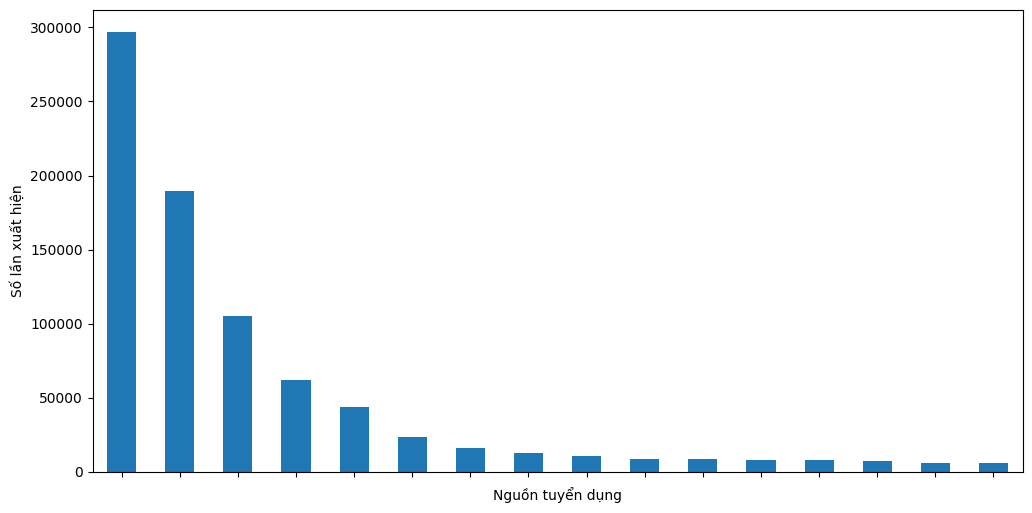

In [ ]:
import matplotlib.pyplot as plt

# Tính tần suất của các giá trị trong cột job_via
job_via_counts = df['portal'].value_counts()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột và lấy đối tượng axes
ax = job_via_counts.plot(kind='bar')

# Ẩn nhãn trục x
ax.set_xticklabels([])

# Thêm nhãn cho trục
plt.xlabel('Nguồn tuyển dụng')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()


In [28]:
# Lấy 15 giá trị xuất hiện nhiều nhất
top_values = df['portal'].value_counts().nlargest(15).index

# Áp dụng gộp các giá trị ngoài top10 thành "Other"
df['portal'] = df['portal'].apply(lambda x: x if x in top_values else 'Other')

print(df['portal'].value_counts().to_string())

portal
Other                  7313
Ai-Jobs.net            4987
LinkedIn               4891
Indeed                 4059
Ladders                3088
ZipRecruiter           1769
Idealist               1523
SimplyHired            1507
FlexJobs               1502
The Muse               1496
Snagajob               1486
Stack Overflow Jobs    1476
Internships.com        1474
USAJOBS                1438
Jobs2Careers           1422
Dice                   1335


In [29]:
df = df.drop(columns=['type'])

df

,company,title,role,posted_date,skills,portal,country,avg_year_salary,time_type,work_type
0,Denodo Technologies,Cloud SysSecOps Engineer,Cloud Engineer,15/02/2023,"['aws', 'azure', 'windows']",Other,Spain,56700.0,Full-time,Employee
1,Denodo Technologies,Cloud DevSecOps Engineer,Cloud Engineer,15/02/2023,"['aws', 'azure', 'puppet', 'ansible', 'chef', ...",Other,Spain,125253.0,Full-time,Employee
2,Scaleai,"Customer Engineer, Computer Vision",Cloud Engineer,25/04/2023,"['typescript', 'python']",Other,Mexico,100000.0,Full-time,Employee
3,Zyreoneconsulting LLC,Cloud Engineer,Cloud Engineer,03/04/2023,"['python', 'aws', 'docker']",Dice,Canada,90000.0,Full-time,Employee
4,MongoDB,"Staff Engineer, Service Architecture",Cloud Engineer,29/11/2023,"['mongodb', 'mongodb', 'c++']",Other,Argentina,197500.0,Full-time,Employee
...,...,...,...,...,...,...,...,...,...,...
40761,Lennar,Data Scientist,Machine Learning Engineer,16/08/2023,[],Stack Overflow Jobs,Benin,73000.0,Part-time,Temp work
40762,Sinopec,Data Scientist,Machine Learning Engineer,25/07/2023,[],Other,Italy,85000.0,Part-time,Temp work
40763,Synchrony Financial,Data Scientist,Machine Learning Engineer,10/08/2023,[],Internships.com,Bhutan,70500.0,Part-time,Temp work
40764,Unum Group,Data Scientist,Machine Learning Engineer,26/05/2023,[],The Muse,Ghana,90000.0,Part-time,Temp work


In [30]:
# Tạo bảng
from google.cloud import bigquery

# Khởi tạo client BigQuery
client = bigquery.Client()

# Tên dự án, dataset và bảng bạn muốn tạo
project_id = 'dw-assignment-242'
dataset_id = 'job_analysis'
table_id = 'cleaned_table'

# Định nghĩa schema của bảng
schema = [
    bigquery.SchemaField('company', 'STRING'),
    bigquery.SchemaField('title', 'STRING'),
    bigquery.SchemaField('role', 'STRING'),
    bigquery.SchemaField('time_type', 'STRING'),
    bigquery.SchemaField('work_type', 'STRING'),
    bigquery.SchemaField('posted_date', 'DATE'),
    bigquery.SchemaField('skills', 'STRING'),
    bigquery.SchemaField('portal', 'STRING'),
    bigquery.SchemaField('country', 'STRING'),
    bigquery.SchemaField('avg_year_salary', 'FLOAT'),
]

# Định nghĩa các thông số bảng
table_ref = client.dataset(dataset_id).table(table_id)

# Tạo bảng mới
table = bigquery.Table(table_ref, schema=schema)
table = client.create_table(table)

print(f"Table {table_id} created in dataset {dataset_id}.")


Table cleaned_table created in dataset job_analysis.


In [31]:
df['skills'] = df['skills'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
dataset_id = "job_analysis"
table_name = "cleaned_table"
query = f"SELECT * FROM `{dataset_id}.{table_name}`"

df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
          project_id=project,
          if_exists='replace')

<ipython-input-31-e2485aea6242>:6: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq(destination_table=f'{dataset_id}.{table_name}',
100%|██████████| 1/1 [00:00<00:00, 5059.47it/s]


In [54]:
# prompt: Tải file csv từ df

# Lưu DataFrame thành file CSV
df.to_csv('output.csv', index=False)

# Tải file CSV về máy tính (nếu đang chạy trên Colab)
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
df

,company,title,role,type,posted_date,skills,portal,country,avg_year_salary,time_type,work_type
0,Denodo Technologies,Cloud SysSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'windows']",Infosec-Jobs.com,Spain,56700.0,Full-time,Employee
1,Denodo Technologies,Cloud DevSecOps Engineer,Cloud Engineer,Full-time,15/02/2023,"['aws', 'azure', 'puppet', 'ansible', 'chef', ...",Infosec-Jobs.com,Spain,125253.0,Full-time,Employee
2,Scaleai,"Customer Engineer, Computer Vision",Cloud Engineer,Full-time,25/04/2023,"['typescript', 'python']","Best AI Jobs: AI, Machine Learning And Data Sc...",Mexico,100000.0,Full-time,Employee
3,Zyreoneconsulting LLC,Cloud Engineer,Cloud Engineer,Full-time,03/04/2023,"['python', 'aws', 'docker']",Dice,Canada,90000.0,Full-time,Employee
4,MongoDB,"Staff Engineer, Service Architecture",Cloud Engineer,Full-time,29/11/2023,"['mongodb', 'mongodb', 'c++']",Levels.fyi,Argentina,197500.0,Full-time,Employee
...,...,...,...,...,...,...,...,...,...,...,...
40761,Lennar,Data Scientist,Machine Learning Engineer,Temp work,16/08/2023,[],Stack Overflow Jobs,Benin,73000.0,Part-time,Temp work
40762,Sinopec,Data Scientist,Machine Learning Engineer,Temp work,25/07/2023,[],Monster,Italy,85000.0,Part-time,Temp work
40763,Synchrony Financial,Data Scientist,Machine Learning Engineer,Temp work,10/08/2023,[],Internships.com,Bhutan,70500.0,Part-time,Temp work
40764,Unum Group,Data Scientist,Machine Learning Engineer,Temp work,26/05/2023,[],The Muse,Ghana,90000.0,Part-time,Temp work
